<a href="https://colab.research.google.com/github/jamesqiu2021/DSCI-401-QW/blob/main/test1_WQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the cereal data and use it to answer the following questions. (Note: For loops are not an acceptable solution for any of these questions.)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cereal = pd.read_csv("https://raw.githubusercontent.com/gjm112/LoyolaTeaching/main/cereal.csv")
manufactures =pd.read_csv("https://raw.githubusercontent.com/gjm112/LoyolaTeaching/main/cereal_mfr.csv")
cereal.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


1(a) (5 points) Merge the manufacturer full name onto the cereal data set.

In [3]:
cereal_merge=pd.merge(cereal,manufactures,left_on="mfr",right_on="mfr",how="inner")
cereal_merge.head(20)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_full
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,Nabisco
2,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,Nabisco
3,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,Nabisco
4,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,Nabisco
5,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993,Nabisco
6,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats
7,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851,Quaker Oats
8,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00,21.871292,Quaker Oats
9,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67,45.328074,Quaker Oats


1(b) (5 points) For this problem, we will only consider low sodium cereals" defined as cereals with less than or equal to 200mg of sodium.
Create a table for the low sodium cereals that shows the mean calories, mean protein, and mean fat content by the full name of the
manufacturer.

In [4]:
cereal_merge1=cereal_merge.loc[:,["mfr_full","calories","protein","fat","sodium"]][cereal_merge["sodium"]<=200].groupby("mfr_full",as_index=False).mean()
cereal_merge1

,mfr_full,calories,protein,fat,sodium
0,American Home Food Products,100.000000,4.000000,1.000000,0.000000
1,General Mills,110.714286,2.214286,1.285714,174.285714
2,Kelloggs,108.571429,2.357143,0.714286,124.285714
3,Nabisco,86.666667,2.833333,0.166667,37.500000
4,Post,111.250000,2.375000,1.000000,138.125000
5,Quaker Oats,86.666667,3.166667,1.666667,50.000000
6,Ralston Purina,120.000000,2.800000,1.800000,167.000000


(c) (5 points) Which 5 cereals have the highest calories per cup (i.e calories / cups)?



In [5]:
cereal_merge2 = cereal_merge
cereal_merge2["calories_per_cup"]=cereal_merge2["calories"]/cereal_merge2["cups"]
highest_calories=cereal_merge2.loc[:,["name","calories_per_cup"]].sort_values(by="calories_per_cup",ascending=False)
highest_calories.head(5)


,name,calories_per_cup
72,Grape-Nuts,440.000000
73,Great Grains Pecan,363.636364
58,Oatmeal Raisin Crisp,260.000000
27,Mueslix Crispy Blend,238.805970
49,Clusters,220.000000


(d) (5 points) For each manufacturer, which of their cereals has the lowest calories per cup (i.e. calories divided by cups)?

In [6]:
cereal_merge3 = cereal_merge2.loc[:,["mfr_full","calories_per_cup"]].groupby("mfr_full",as_index=False).min()
cereal_merge3
cereal_merge4 = pd.merge(cereal_merge3,highest_calories,left_on="calories_per_cup",right_on="calories_per_cup",how="inner")
cereal_merge4

,mfr_full,calories_per_cup,name
0,American Home Food Products,100.000000,Cream of Wheat (Quick)
1,American Home Food Products,100.000000,Wheaties
2,American Home Food Products,100.000000,Multi-Grain Cheerios
3,American Home Food Products,100.000000,Total Whole Grain
4,American Home Food Products,100.000000,All-Bran with Extra Fiber
5,American Home Food Products,100.000000,Corn Flakes
6,American Home Food Products,100.000000,Product 19
7,American Home Food Products,100.000000,Maypo
8,General Mills,73.333333,Kix
9,Kelloggs,90.000000,Strawberry Fruit Wheats


(e) (10 points) Create a scatterplot of sugars vs rating for cereals manufactured by General Mills, Kellogg's, and Post with color used to
represent each of the different manufacturers. Add a trend line using
loess through each of the groups separately. Comment on the rela-
relationship between sugars and rating for these manufacturers (target
figure shown below).

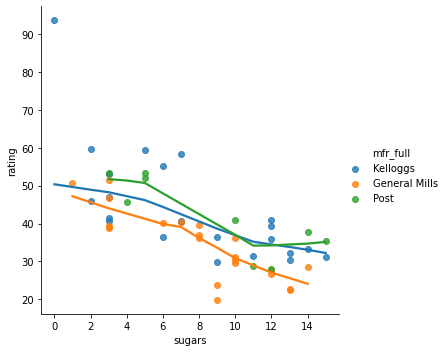

In [15]:
#generate the new dataframe
cereal_merge5 = cereal_merge.loc[:,["mfr_full","sugars","rating"]][(cereal_merge.mfr_full=="General Mills")|(cereal_merge.mfr_full=="Post")|(cereal_merge.mfr_full=="Kelloggs")]  
cereal_merge5

#plots
plots1=sns.lmplot (x= "sugars", y = "rating", hue = 'mfr_full', lowess=True, data = cereal_merge5)
plots1

# comments: The level of sugars in the cereals was negatively correlated with the rating from all these manufactures. 

(f) (10 points) Find the correlation between protein and potassium for
each of the shelves (the correlation function in R is "cor").


In [25]:
correlation = cereal_merge.loc[:,["shelf","protein","potass"]].groupby("shelf").corr()
correlation

protein    potass
shelf                            
1     protein  1.000000  0.442439
      potass   0.442439  1.000000
2     protein  1.000000  0.479806
      potass   0.479806  1.000000
3     protein  1.000000  0.711762
      potass   0.711762  1.000000

(g) (10 points) Recreate the table presented below. The rows are the
shelf 1, 2, and 3 and each column is a quantile of the distribution of
calories for each shelf. So for example, the 80-th percentile of calories
for cereal found on shelf 3 is 130.

2. Use the data found here about food inspection found here to answer the following questions. (Note: Remove observations with license number 0 be-
fore beginning!) https://www.dropbox.com/s/ra8s2tonbl037m2/inspections clean.csv?dl=0

In [27]:
#inspection <- read.csv("inspections_clean.csv")
#inspection %>% head(5)
inspection=pd.read_csv("inspections_clean.csv")
inspection.head(5)

FileNotFoundError: ignored